In [18]:
# Dependencies
import tweepy
import json
import numpy as np
from matplotlib import pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [19]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
# Target Search Term
target_terms = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]

In [22]:
# Lists to hold sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [51]:
# Grab 100 tweets
public_tweets=dict()
# tmp_tweet = api.search(target_term, count=1, result_type="recent")
# print(tmp_tweet)
for target_term in target_terms:
    public_tweet = api.search(q=target_term, count=100, result_type="recent")
    public_tweets[target_term]=public_tweet['statuses']
    


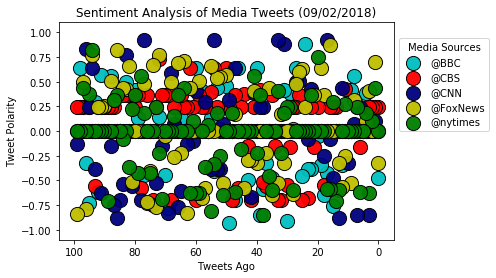

,source,tweet,date,compound,pos,neu,neg,tweets_ago
0,@BBC,RT @imra_mra: #SaturdayMotivation \n\n@Ministr...,Sun Sep 02 04:48:53 +0000 2018,-0.4753,0.139,0.616,0.246,1
1,@BBC,RT @DealingWithEvil: Get the boy married as so...,Sun Sep 02 04:48:47 +0000 2018,0.0000,0.000,1.000,0.000,2
2,@BBC,@kingofsky_3 @kingofskyjp @POTUS @PutinRF @the...,Sun Sep 02 04:48:44 +0000 2018,0.0000,0.000,1.000,0.000,3
3,@BBC,@kingofsky_3 @kingofskyjp @sputnik_jp @realDon...,Sun Sep 02 04:48:29 +0000 2018,0.0000,0.000,1.000,0.000,4
4,@BBC,"RT @Nang0777: Dear @theresa_may, as you contin...",Sun Sep 02 04:48:08 +0000 2018,0.3818,0.110,0.890,0.000,5
5,@BBC,#GenocideInSouthernCameroons How many more #Am...,Sun Sep 02 04:48:00 +0000 2018,0.0000,0.000,1.000,0.000,6
6,@BBC,RT @DealingWithEvil: @TheHaryanavi @rashtrapat...,Sun Sep 02 04:47:48 +0000 2018,0.0000,0.000,1.000,0.000,7
7,@BBC,RT @DealingWithEvil: May be we have become use...,Sun Sep 02 04:47:39 +0000 2018,0.0000,0.000,1.000,0.000,8
8,@BBC,"RT @DealingWithEvil: Don't ever think - ""this ...",Sun Sep 02 04:47:31 +0000 2018,0.5610,0.214,0.786,0.000,9
9,@BBC,RT @DealingWithEvil: Who will return the 3 yea...,Sun Sep 02 04:47:22 +0000 2018,0.4137,0.155,0.845,0.000,10


In [64]:
# Loop through all tweets
import datetime
import pandas as pd
souce_plot = dict()

dt_list = []
for term,tweets in public_tweets.items():
    senti = []
    j=0
    for j in range(len(tweets)):
        t = tweets[j]
        content_str = t['text']
        time_str = t['created_at']
        compound = analyzer.polarity_scores(content_str)["compound"]
        pos = analyzer.polarity_scores(content_str)["pos"]
        neu = analyzer.polarity_scores(content_str)["neu"]
        neg = analyzer.polarity_scores(content_str)["neg"]
        senti.append(float(compound))
        # add data to list for DataFrame
        dt_list.append([term,content_str,time_str,compound,pos,neu,neg,j+1])
        
    souce_plot[term] = senti

# PLOT
color=['c','r','navy','y','g']
i = 0
for term, senti in souce_plot.items():
    plt.scatter(range(0,100), senti, c=color[i],edgecolor='black', s=200, alpha=0.95, label=term)
    i+=1
time_str = datetime.datetime.now()
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time_str.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches="tight")
plt.show()

dt = pd.DataFrame(dt_list,columns=['source','tweet','date','compound','pos','neu','neg','tweets_ago'])
dt.head(10)

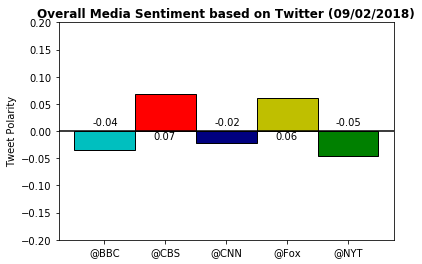

In [70]:
# Create bar chart
import numpy as np
color=['c','r','navy','y','g']
i = 0
mean_list = []
for term, senti in souce_plot.items():
    senti_pd = np.array(senti)
    plt.bar(i, senti_pd.mean(), color = color[i],edgecolor='black', width=1)
    mean_list.append(senti_pd.mean())
    i+=1
time_str = datetime.datetime.now()
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time_str.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
x_labels = ["@BBC", "@CBS", "@CNN", "@Fox", "@NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)


for a,b in zip(np.arange(5), mean_list):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))             
        
        
plt.savefig("Overall Media Sentiment.png")
plt.show()

{'Compound': 0.04567, 'Positive': 0.05797000000000001, 'Neutral': 0.03783, 'Negative': 0.9042100000000001}
